In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

dT = 0.01  # it will be  changed

dirPath = os.path.abspath(os.path.dirname(''))
params_file='params.txt'
data_file='data.csv'
full_data_path = os.path.join(dirPath, data_file)
full_params_path = os.path.join(dirPath, params_file)

data_raw = pd.read_csv(full_data_path)
with open(full_params_path) as file:
    l = file.readline()
    file.readline()
    dT = float((l.split(' '))[1])


data = pd.DataFrame(data=data_raw)
interest_a = 1500
interest_b = 2000
dT = data['t'][1]-data['t'][0]
d = data[interest_a:interest_b] #19 30


n = 1   # granularity
#data[830:842]
data.tail(10)

,x,y,t,torque,steering_angle,long_acc,long_vel,lat_acc,lat_vel,yaw_angle,...,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r,track_progress,error
6086,10.4346,-7.01113,6.086,-624.13,0.0,-3.22145,0.860609,0.708508,-0.077749,-1.35159,...,0.120207,0.061444,6650.81,6026.68,0.100411,0.056640,596.152,305.350,13.5283,1.1359
6087,10.4347,-7.01198,6.087,-624.13,0.0,-3.22143,0.857387,0.704673,-0.077044,-1.35160,...,0.119265,0.061418,6650.81,6026.68,0.099625,0.056617,591.641,305.226,13.5283,1.1359
6088,10.4348,-7.01283,6.088,-624.13,0.0,-3.22140,0.854166,0.700848,-0.076343,-1.35161,...,0.118330,0.061389,6650.81,6026.68,0.098844,0.056590,587.156,305.082,13.5283,1.1359
6089,10.4349,-7.01368,6.089,-624.13,0.0,-3.22137,0.850944,0.697031,-0.075647,-1.35163,...,0.117401,0.061355,6650.81,6026.68,0.098067,0.056558,582.697,304.916,13.5283,1.1359
6090,10.4350,-7.01452,6.090,-624.13,0.0,-3.22135,0.847723,0.693222,-0.074953,-1.35164,...,0.116478,0.061316,6650.81,6026.68,0.097296,0.056523,578.265,304.730,13.5283,1.1359
6091,10.4351,-7.01536,6.091,-624.13,0.0,-3.22132,0.844502,0.689423,-0.074264,-1.35165,...,0.115560,0.061274,6650.81,6026.68,0.096530,0.056484,573.858,304.523,13.5283,1.1359
6092,10.4352,-7.01620,6.092,-624.13,0.0,-3.22130,0.841280,0.685631,-0.073578,-1.35166,...,0.114649,0.061227,6650.81,6026.68,0.095768,0.056441,569.478,304.295,13.5283,1.1359
6093,10.4353,-7.01703,6.093,-624.13,0.0,-3.22128,0.838059,0.681849,-0.072896,-1.35167,...,0.113743,0.061177,6650.81,6026.68,0.095012,0.056394,565.123,304.048,13.5283,1.1359
6094,10.4354,-7.01786,6.094,-624.13,0.0,-3.22125,0.834838,0.678075,-0.072218,-1.35168,...,0.112843,0.061122,6650.81,6026.68,0.094260,0.056344,560.793,303.780,13.5283,1.1359
6095,10.4356,-7.01869,6.095,-624.13,0.0,-3.22123,0.831617,0.674309,-0.071544,-1.35169,...,0.111949,0.061063,6650.81,6026.68,0.093513,0.056289,556.489,303.493,13.5283,1.1359


Text(0.5, 1.0, 'long_vel')

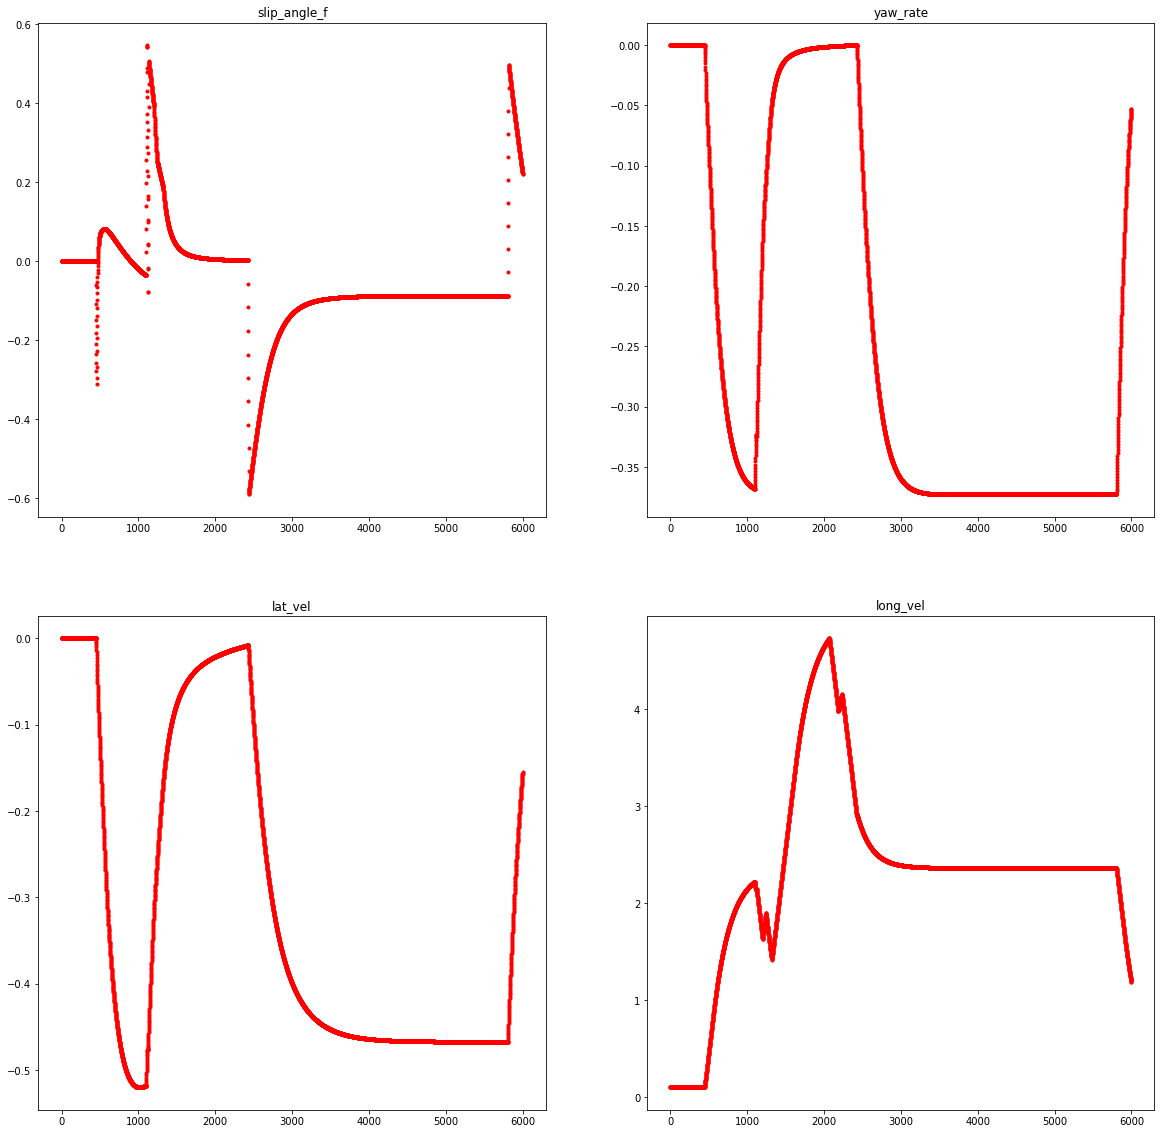

In [44]:
plt.figure(figsize=(20,20))
a = 0
b = 6000
ax = plt.subplot(221)
plt.plot(data['slip_angle_f'][a:b], '.r');
plt.title('slip_angle_f')

ax = plt.subplot(222)
plt.plot(data['yaw_rate'][a:b], '.r');
plt.title('yaw_rate')

ax = plt.subplot(223)
plt.plot(data['lat_vel'][a:b], '.r');
plt.title('lat_vel')

ax = plt.subplot(224)
plt.plot(data['long_vel'][a:b], '.r');
plt.title('long_vel')


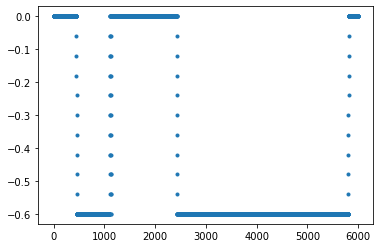

In [45]:
a = 0
b = 6000
plt.plot(data['steering_angle'][a:b], '.')

Text(0.5, 1.0, 'slip_angle_f')

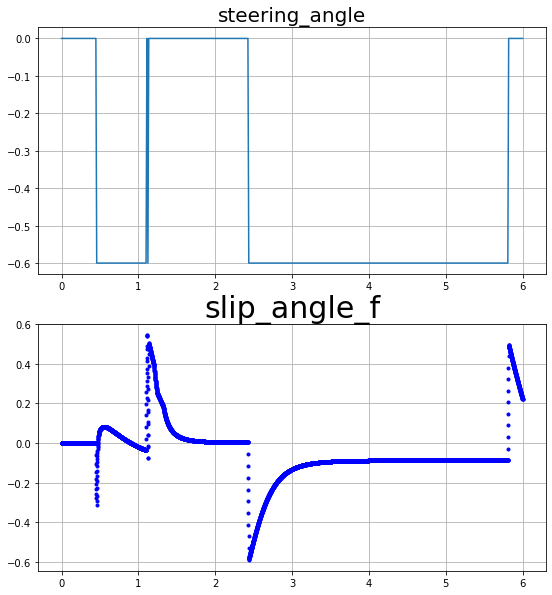

In [46]:
plt.figure(figsize=(20,10))
ax = plt.subplot(221)
plt.plot(data['t'][a:b], data['steering_angle'][a:b])
plt.grid(True)
plt.title('steering_angle', fontsize=20)
#ax.set_aspect('equal')


# x(t)
ax = plt.subplot(223)
plt.plot(data['t'][a:b], data['slip_angle_f'][a:b], '.b')
plt.grid(True)
plt.title('slip_angle_f', fontsize=30)

Text(0.5, 1.0, 'speed(t)')

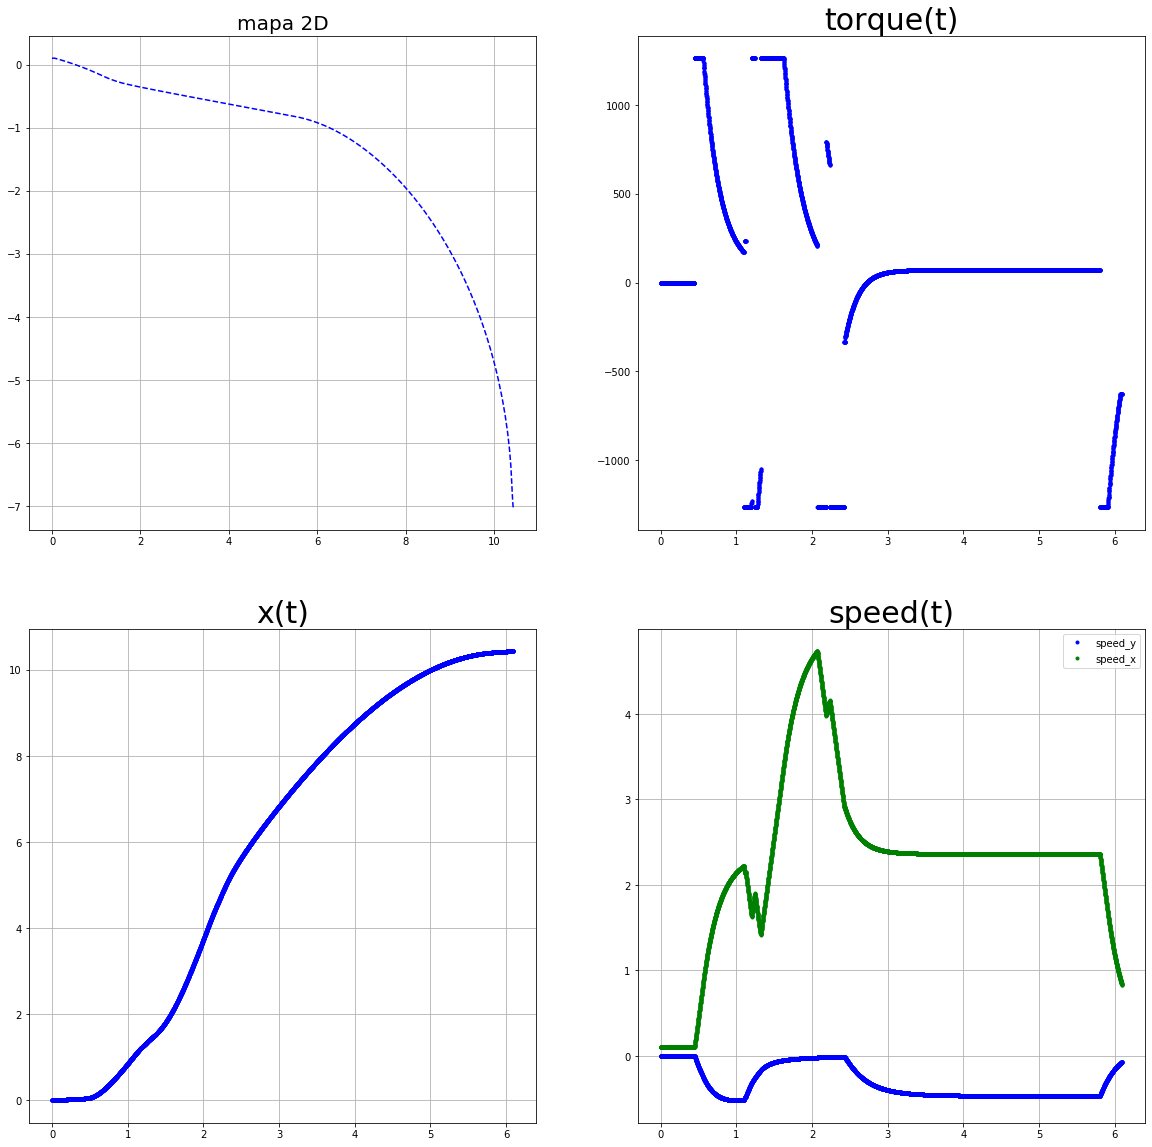

In [47]:
plt.figure(figsize=(20,20))
granularity = 1

x = data['x'][::granularity]
y = data['y'][::granularity]
t = data['t'][::granularity]
speed_x = data['long_vel'][::granularity]
speed_y = data['lat_vel'][::granularity]

# mapa 2d
ax = plt.subplot(221)
plt.plot(x, y, '--b')
plt.grid(True)
plt.title('mapa 2D', fontsize=20)
#ax.set_aspect('equal')


# x(t)
ax = plt.subplot(223)
plt.plot(t, x, '.b')
plt.grid(True)
plt.title('x(t)', fontsize=30)
#ax.set_aspect('equal')


# y(t)
#ax = plt.subplot(223)
#plt.plot(t, y, '--b')
#plt.grid(True)
#plt.title('y(t)', fontsize=30)
#ax.set_aspect('equal')

ax = plt.subplot(222)
plt.plot(data['t'][:][::granularity], data['torque'][:][::granularity], '.b')
plt.title('torque(t)', fontsize=30)

# speed
ax = plt.subplot(224)
ax.plot(t, speed_y, '.b', label='speed_y')
ax.plot(t, speed_x, '.g', label='speed_x',)
ax.grid(True)
ax.legend()
plt.title('speed(t)', fontsize=30)
#ax.set_aspect('equal')


[]

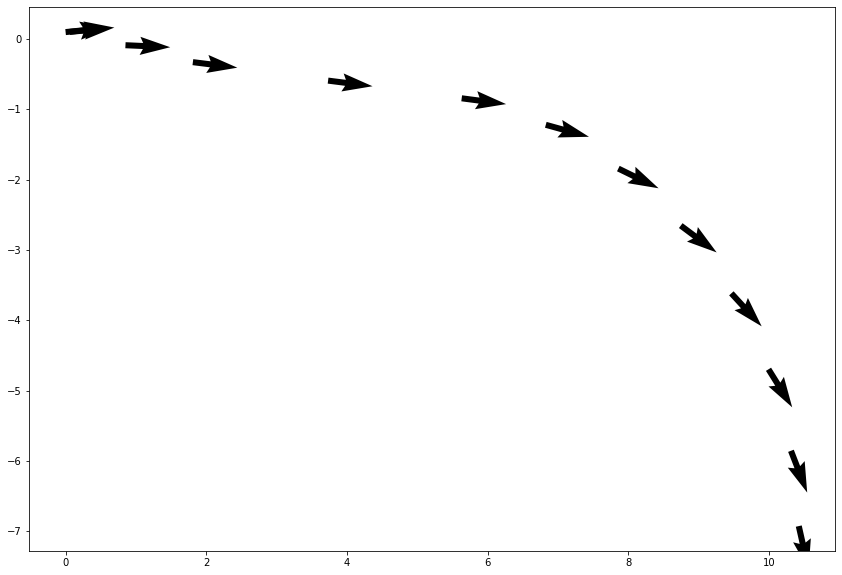

In [49]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']
n = 500

x = data_x[::n]
y = data_y[::n]
u = np.cos(data_yaws)[::n]
v = np.sin(data_yaws)[::n]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

Text(0.5, 1.0, 'torque(t)')

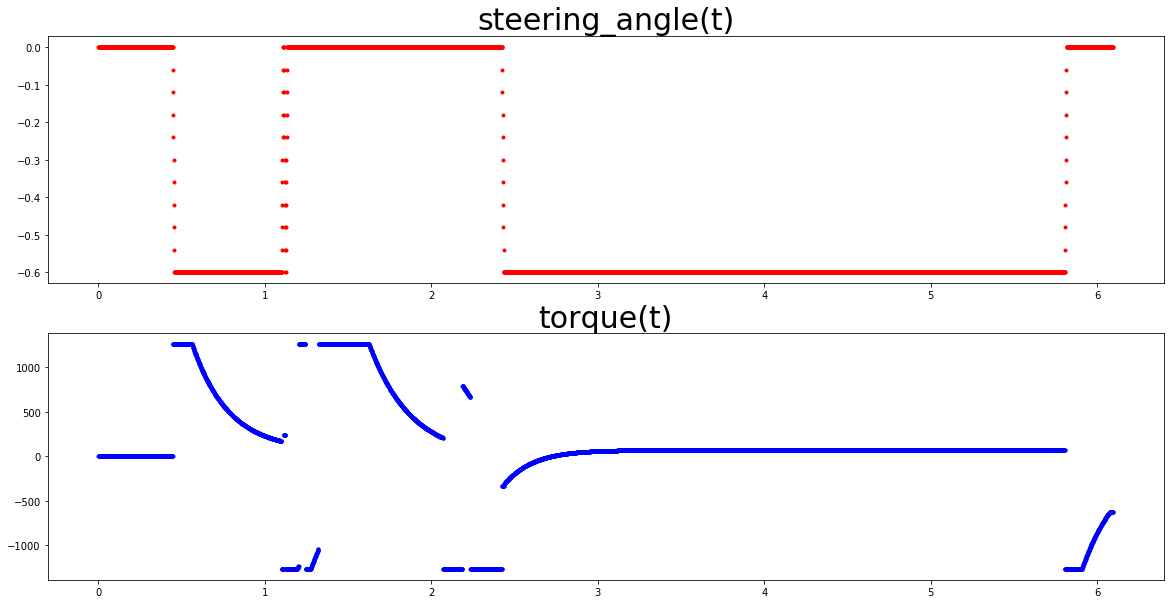

In [29]:
fig = plt.figure(figsize=(20,10))
granularity = 1
plt.subplot(211)
plt.plot(data['t'][:][::granularity], data['steering_angle'][:][::granularity], '.r')
plt.title('steering_angle(t)', fontsize=30)

plt.subplot(212)
plt.plot(data['t'][:][::granularity], data['torque'][:][::granularity], '.b')
plt.title('torque(t)', fontsize=30)

Text(0.5, 1.0, 'kąt(t)')

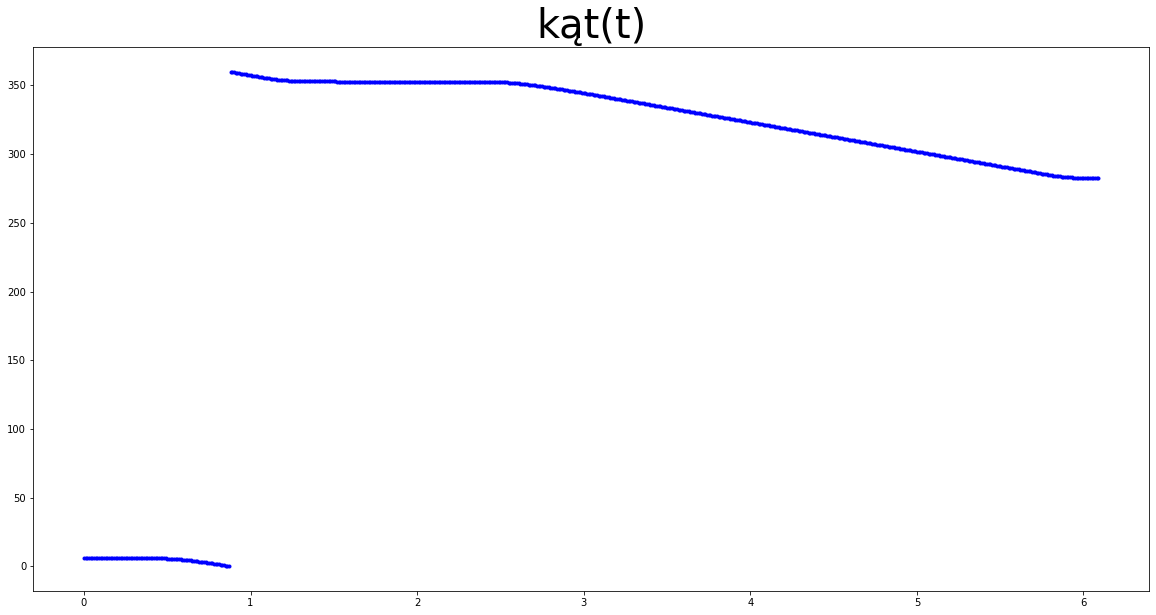

In [30]:
interest_a = 0
interest_b = 800
n = 10
yaw = np.rad2deg(np.unwrap(data['yaw_angle'][:][::n])) %360

max_yaw = np.max(yaw)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], yaw, '.b')
plt.title('kąt(t)', fontsize=40)

Text(0.5, 1.0, 'speed x and y')

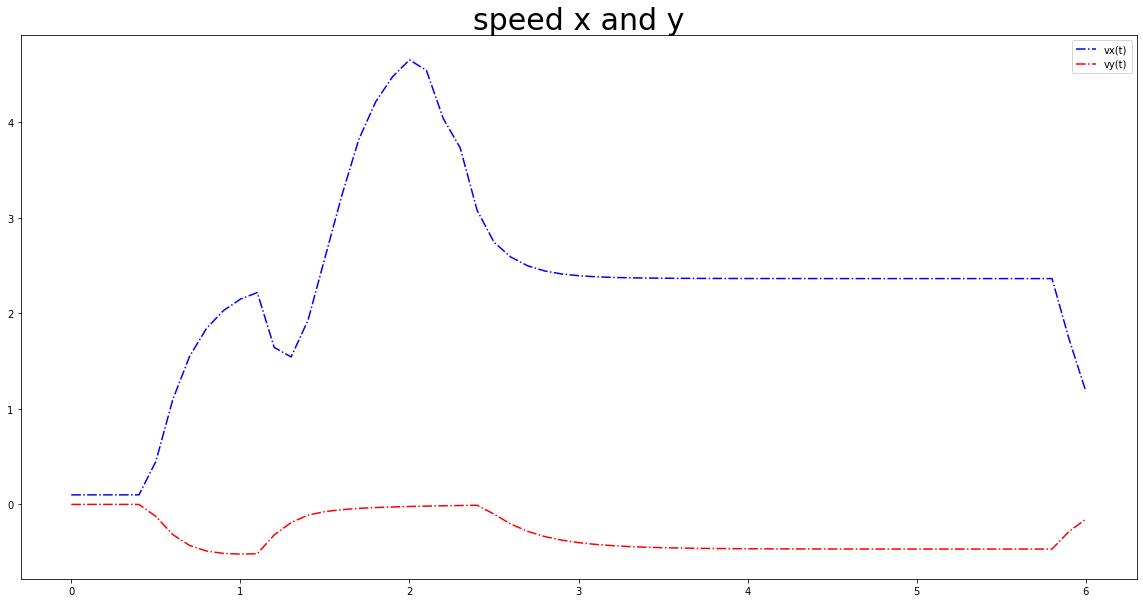

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
max_speed = np.max([data['long_vel'], data['lat_vel']])
n = 100
ax.plot(data['t'][::n], data['long_vel'][::n], '-.b', label='vx(t)')
ax.plot(data['t'][::n], data['lat_vel'][::n], '-.r', label='vy(t)')
leg = ax.legend();
plt.title('speed x and y', fontsize=30)

Text(0.5, 1.0, 'slip_angle_front(t)')

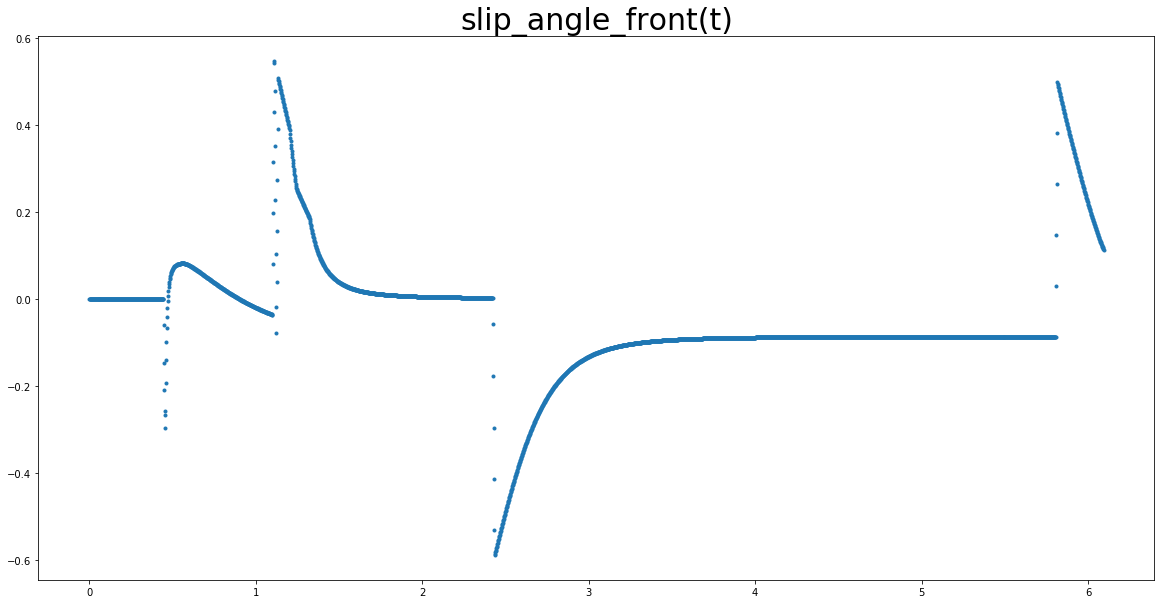

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
slip_angle = data['slip_angle_f']
interest_a = 0
interest_b = 0
n = 2

max_slip = np.max([data['slip_angle_f'], data['slip_angle_r']])
ax.plot(data['t'][:][::n], slip_angle[:][::n], '.')
plt.title('slip_angle_front(t)', fontsize=30)
#ax.plot([angle_ch_t_1]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', \
#         [angle_ch_t_2]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', alpha=0.2)

Text(0.5, 1.0, 'vx^2 + vy^2')

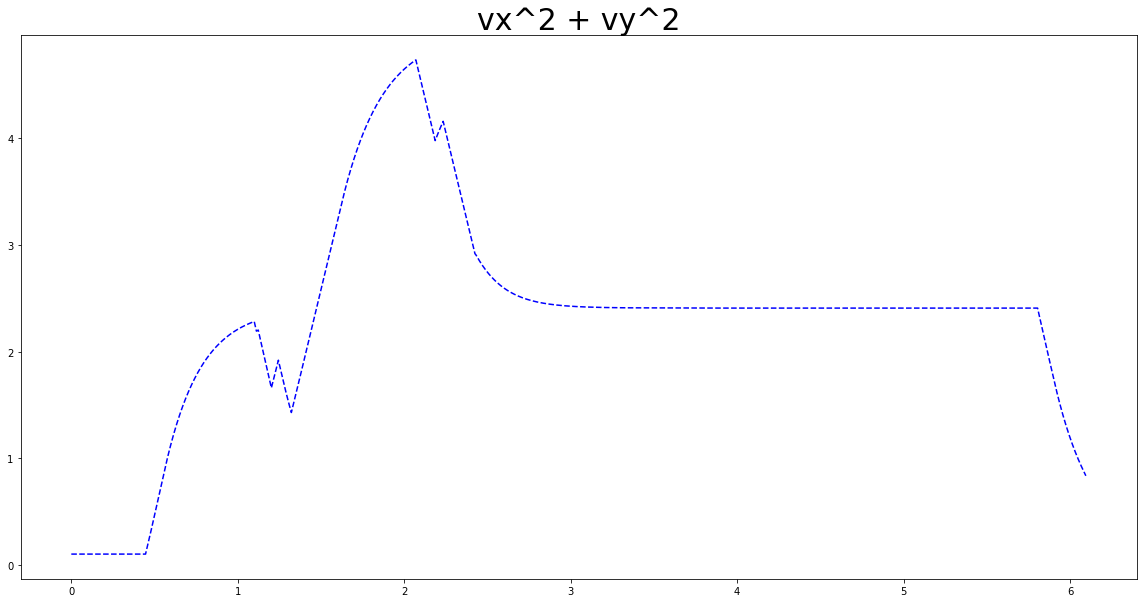

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
energy_data = np.sqrt(data['long_vel'][:]**2 + data['lat_vel'][:]**2)
max_en = np.max(energy_data)

ax.plot(data['t'][:], energy_data, '--b')
plt.title('vx^2 + vy^2', fontsize=30)

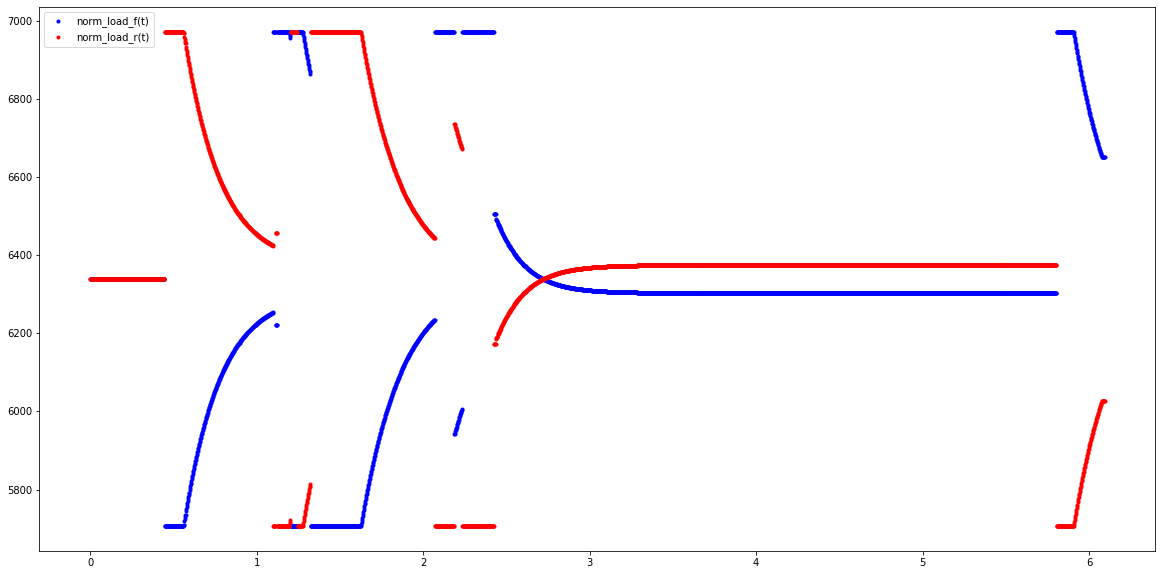

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][:][::n], data['norm_load_f'][:][::n], '.b', label='norm_load_f(t)')
ax.plot(data['t'][:][::n], data['norm_load_r'][:][::n], '.r', label='norm_load_r(t)')
leg = ax.legend();

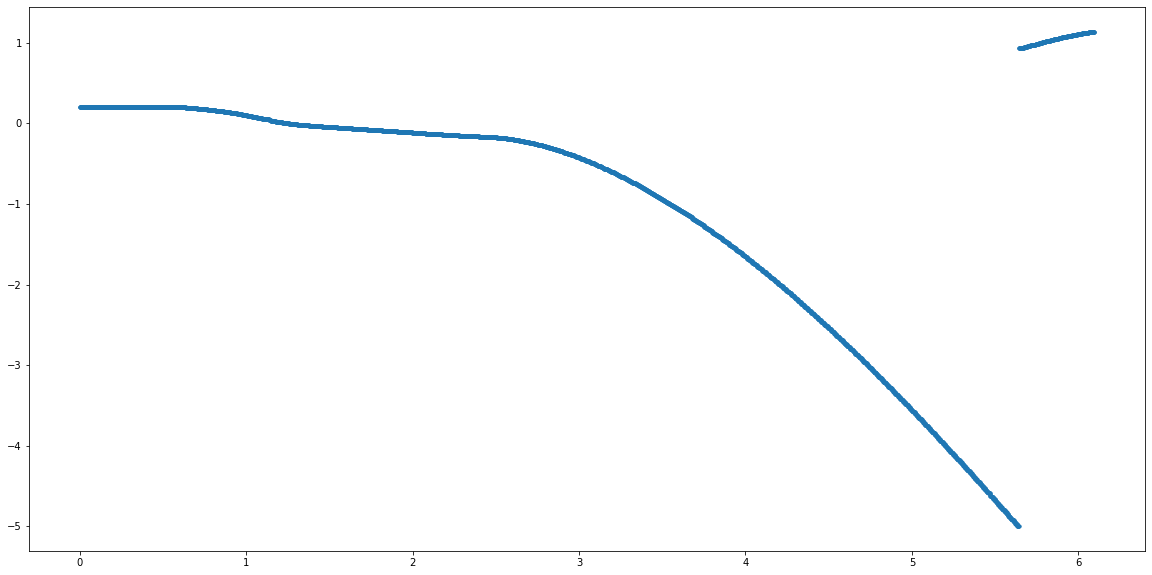

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'], data['error'], '.')

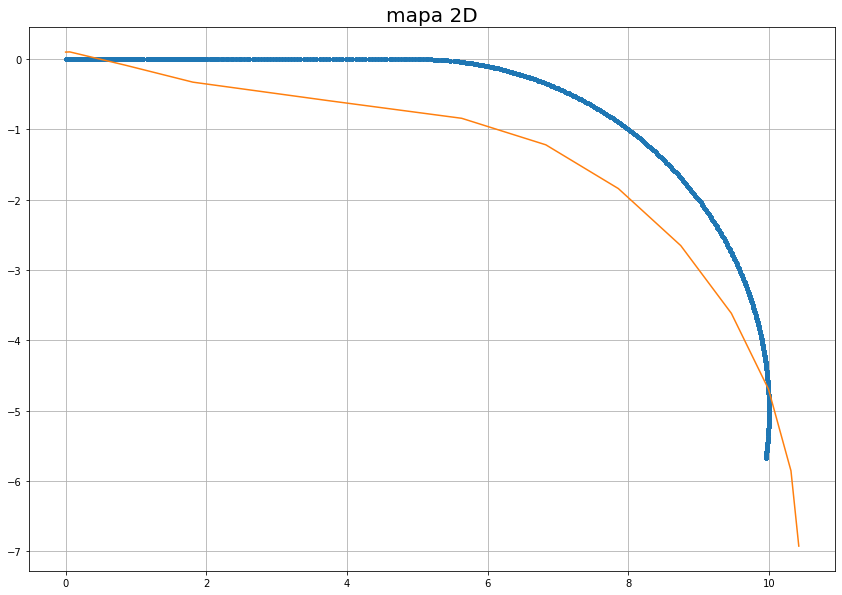

In [93]:
 import sys

skidpad_path = '/home/marcel/catkin_ws/src/skidpad_planner/scripts/'
sys.path.append(os.path.abspath(skidpad_path))
import skidpad

skid = skidpad.Skidpad(5,5,5)

#s = np.linspace(0, 10+40*np.pi, num=1000)


x = data['x'][::granularity]
y = data['y'][::granularity]
t = data['t'][::granularity]
track_progress = data['track_progress']

x_track = [5+skid.y(s) for s in track_progress]
y_track = [-skid.x(s) for s in track_progress]


fig = plt.figure(figsize=(20,10))
plt.plot(x_track[::1], y_track[::1], '.')
plt.plot(data['x'][:][::n], data['y'][:][::n])
plt.grid(True)
plt.title('mapa 2D', fontsize=20)
ax = plt.gca()
ax.set_aspect('equal')

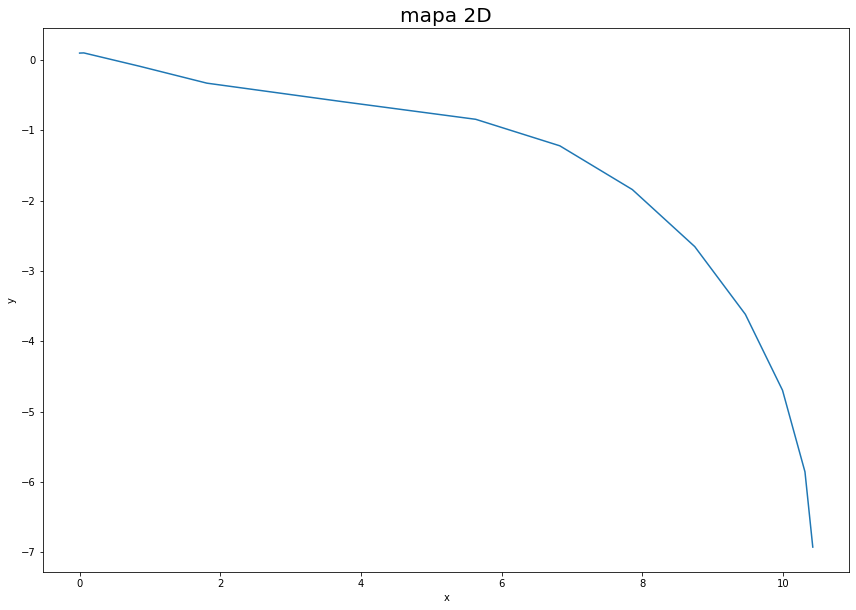

In [90]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

interest_a = 0
interest_b = 700

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][:][::n], data['y'][:][::n])

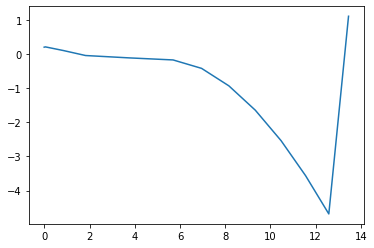

In [92]:
plt.plot(data['track_progress'][:][::n], data['error'][:][::n])